In [3]:
import torch, math
import numpy as np
import matplotlib.pyplot as plt

In [4]:
input_nodes = 40
units = 64
output_nodes = 1

In [6]:
def initialize_params(input_nodes, units, output_nodes):

    def normal(shape):
        return np.random.normal(0, 1, size = shape)

    def matrix():
        return (normal((input_nodes, units)), normal((units, units)), torch.zeros(units))

    w_xz, w_hz, b_z = matrix()
    w_xr, w_hr, b_r = matrix()
    w_xh, w_hh, b_h = matrix()
    w_x_candid, w_h_candid, b_candid = matrix()

    #output parameters
    w_hq = normal((units, output_nodes))
    b_q = torch.zeros(output_nodes, )
    
    return [w_xz, w_hz, b_z, w_xr, w_hr, b_r, w_xh, w_hh, b_h, w_x_candid, w_h_candid, b_candid, w_hq, b_q]

In [7]:
def lstm(inputs, params):
    w_xz, w_hz, b_z, w_xr, w_hr, b_r, w_xh, w_hh, b_h, w_x_candid, w_h_candid, b_candid, w_hq, b_q = params 
    H = np.random.normal(0, 1, size =(input_nodes, units))

    outputs = []
    for X in inputs: 
        Z = torch.sigmoid((np.matmul(X, w_xz))+(np.matmul(H, w_hz))+b_z)
        R = torch.sigmoid((np.matmul(X, w_xr))+(np.matmul(H, w_hr))+b_r)
        H_tilda = torch.tanh(np.matmul(X, w_xh)+(np.matmul((R * H), w_hh))+b_h)
        torch.tanh(np.matmul(X, w_x_candid) + np.matmul(H, w_h_candid) + b_candid)
        H = Z * H + (1 - Z) * H_tilda

    return H

In [8]:
def conver_to_dataset(signal, step):
  X = []
  Y = []
  for i in range(len(signal) - step):
    j = i + step
    X.append(signal[i:j])
    Y.append(signal[j])
  return np.array(X), np.array(Y)

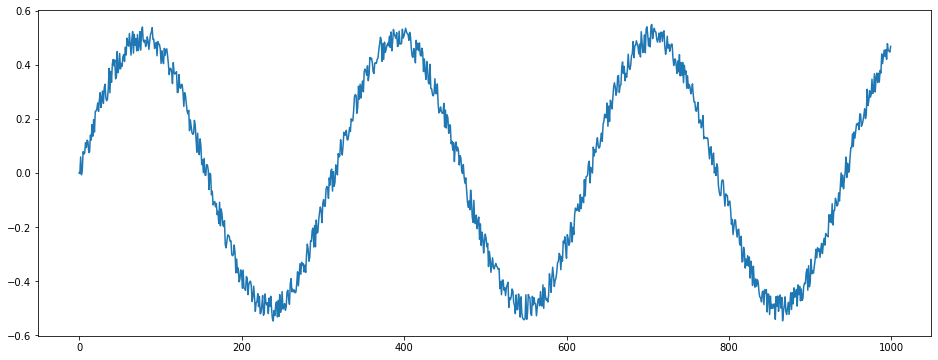

In [9]:
N = 1000 
t = np.arange(0, N)
data_sine = np.sin(0.02 * t)/2 + np.random.uniform(-0.05, 0.05, N)
plt.figure(figsize=(16, 6))
plt.plot(data_sine)

In [10]:
X_sine, Y_sine = conver_to_dataset(data_sine, 40)
X_sine = torch.Tensor(X_sine)

In [11]:
params = initialize_params(input_nodes, units, output_nodes)
gru_output = lstm(X_sine, params)

In [13]:
w_hq = params[12]
b_q = params[13]

np.matmul(gru_output, w_hq) + b_q

tensor([[  1.1931],
        [ -0.6274],
        [-11.8566],
        [ -1.9326],
        [  9.5090],
        [ 17.3786],
        [ 15.6830],
        [ -4.8475],
        [  5.9798],
        [  5.1953],
        [ -4.5270],
        [  0.2411],
        [ -9.3798],
        [ -1.0631],
        [  1.8461],
        [ -1.2999],
        [  7.9853],
        [  5.5849],
        [ -1.9275],
        [  1.5454],
        [  9.4994],
        [ -3.7567],
        [ -8.8235],
        [ -0.5562],
        [ -9.3747],
        [ -5.4314],
        [  6.5910],
        [ 19.5994],
        [ 17.4860],
        [ -6.4781],
        [  1.7968],
        [  2.5074],
        [ -5.3953],
        [  2.3269],
        [  0.2051],
        [  1.9995],
        [  7.8192],
        [ -1.7104],
        [-11.9929],
        [ -2.0217]], dtype=torch.float64)

In [ ]:
# # LSTM Unit

# 𝑐̃ 𝑡=tanh(𝑊𝑐[𝑎𝑡−1,𝑥𝑡]+𝑏𝑐)

# 𝐺𝑢=𝜎(𝑊𝑢[𝑎𝑡−1,𝑥𝑡]+𝑏𝑢)

# 𝐺𝑓=𝜎(𝑊𝑓[𝑎𝑡−1,𝑥𝑡]+𝑏𝑓)

# 𝐺𝑜=𝜎(𝑊𝑜[𝑎𝑡−1,𝑥𝑡]+𝑏𝑜)

# 𝑐𝑡=𝐺𝑢∗𝑐̃ 𝑡+𝐺𝑓∗𝑐𝑡−1

# 𝑎𝑡=𝐺𝑜∗𝑡𝑎𝑛ℎ(𝑐𝑡)